In [132]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

In [133]:
data = pd.read_csv(r'C:\Users\Asus\Downloads\train_LZdllcl.csv')

In [134]:
data.shape

(54808, 14)

In [135]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [137]:
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [138]:
data.nunique()

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        5
length_of_service          35
KPIs_met >80%               2
awards_won?                 2
avg_training_score         61
is_promoted                 2
dtype: int64

In [139]:
#Drop employee_id column as it is just a unique id
data.drop('employee_id', inplace=True, axis=1)

In [140]:
#percentage of zero values in columns
data.isnull().mean()*100

department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

In [141]:
#entries with missing values in previous_year_rating 
data.loc[data['previous_year_rating'].isnull()].head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
10,Technology,region_23,NaN,m,sourcing,1,30,NaN,1,0,0,77,0
23,Procurement,region_5,Bachelor's,m,other,1,27,NaN,1,0,0,70,0
29,Sales & Marketing,region_4,Bachelor's,m,sourcing,1,26,NaN,1,0,0,44,0
56,Sales & Marketing,region_31,Bachelor's,f,other,1,29,NaN,1,0,0,49,0
58,Sales & Marketing,region_16,Bachelor's,m,other,2,27,NaN,1,1,0,47,0


the reason that previous_year_rating = NaN may be due to short work experience (length_of_service=1)

In [142]:
#unique values length_of_service for previous_year_rating=NaN
data.loc[data['previous_year_rating'].isnull()].length_of_service.unique()

array([1], dtype=int64)

In [143]:
#fill missing value
data['previous_year_rating'] = data['previous_year_rating'].fillna(1)
data['previous_year_rating'] = data['previous_year_rating'].astype('int')
data['education'] = data['education'].fillna(data['education'].mode()[0])

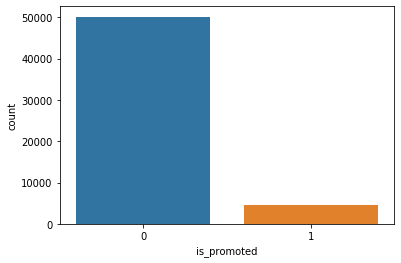

In [144]:
#target variable ratio
sns.countplot(data['is_promoted'])

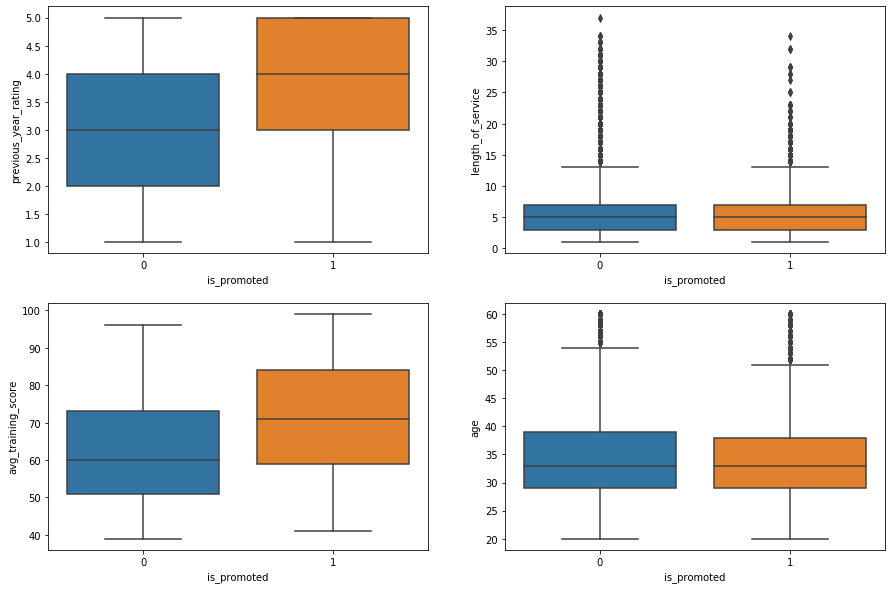

In [168]:
# Visualize relationship between is_promoted and other numerical characteristics
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(ax=axes[0, 0], x=data['is_promoted'], y=data['previous_year_rating'])
sns.boxplot(ax=axes[0, 1], x=data['is_promoted'], y=data['length_of_service'])
sns.boxplot(ax=axes[1, 0], x=data['is_promoted'], y=data['avg_training_score'])
sns.boxplot(ax=axes[1, 1], x=data['is_promoted'], y=data['age'])

In [146]:
#percentage of people who received a promotion depending on their gender
data.groupby('gender')['is_promoted'].value_counts(normalize=True)

gender  is_promoted
f       0              0.910066
        1              0.089934
m       0              0.916849
        1              0.083151
Name: is_promoted, dtype: float64

In [147]:
#percentage of people who received a promotion depending on their education
data.groupby('education')['is_promoted'].value_counts(normalize=True)

education         is_promoted
Bachelor's        0              0.919904
                  1              0.080096
Below Secondary   0              0.916770
                  1              0.083230
Master's & above  0              0.901441
                  1              0.098559
Name: is_promoted, dtype: float64

In [154]:
#percentage of people who have been promoted depending on the awards they have
data.groupby('awards_won?')['is_promoted'].value_counts(normalize=True)

awards_won?  is_promoted
0            0              0.923251
             1              0.076749
1            0              0.559843
             1              0.440157
Name: is_promoted, dtype: float64

Text(0.5, 1, 'Correlation plot')

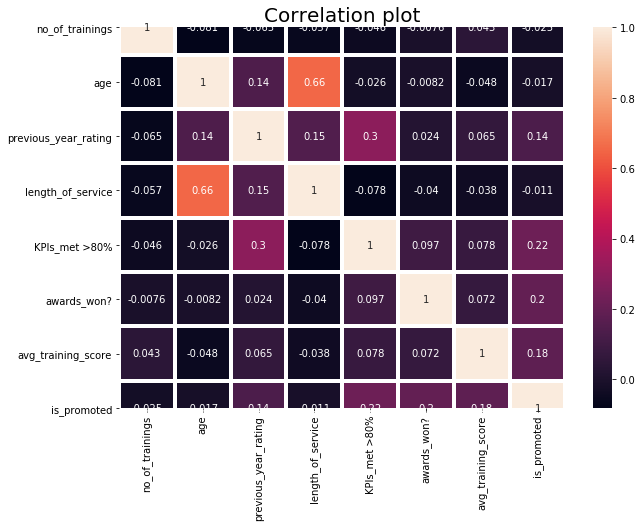

In [165]:
#correlation between features
plt.figure(figsize=(10, 7))
sns.heatmap(data.corr(), annot=True,linewidths=3)
plt.title('Correlation plot', fontsize=20)

In [188]:
#replacing categorical data with dummy variables
columns_obj_type = data.select_dtypes('object').columns
dummies = pd.get_dummies(data[columns_obj_type], drop_first=True)
data = pd.concat([data, dummies], axis=1)
data.drop(columns_obj_type, axis=1, inplace=True)